# Psychoinformatics - Week 13 (Examples)
by Tsung-Ren (Tren) Huang (trhuang@g.ntu.edu.tw)

In [2]:
%config IPCompleter.greedy=True 
%matplotlib inline
import numpy as np
from matplotlib.pyplot import *
from IPython.display import *
import re
import warnings
warnings.filterwarnings("ignore") 

## 1 Regular Expression

### 1.0 Basic String Operations

In [3]:
a='This is a built-in module'
print(a.lower(),a.upper())
print(a.split(' '),a.split('-'))
print(a.find('built'),a[10:15])
print(a.replace('module','library'))
print(a.count('is'))
print(a.center(50,'='))

this is a built-in module THIS IS A BUILT-IN MODULE
['This', 'is', 'a', 'built-in', 'module'] ['This is a built', 'in module']
10 built
This is a built-in library
2
============This is a built-in module=============


### 1.1 Verification

In [4]:
import re
print(bool(re.match('[A-Za-z]\d{9}','S123456789')))

True


In [5]:
print(bool(re.match('[^@]+@[^@]+\.[^@]+','a@b.c')))

True


### 1.2 Search, Match, & Find

In [6]:
regex=re.compile('abc',re.IGNORECASE)
txt='hi AbC aBc'
print('-'*50)
out=regex.search(txt) #inexact match
if(out): print('search() found:',out.string)
out=regex.match(txt) #exact match
if(out): print('match() found:',out.string)
out=regex.findall(txt) #search into a list
if(out): print('findall() found:',out)

--------------------------------------------------
search() found: hi AbC aBc
findall() found: ['AbC', 'aBc']


### 1.3 Analysis of retweets

In [22]:
tweets=['RT @spiketren  No class tomorrow','No class tomorrow (via @spiketren)']
rt=re.compile('(RT|via) (@\w+)')
#rt=re.compile('(RT|\(via) (@\w+\)*)')
for t in tweets:
    m=rt.search(t)
    print(m.group(0),m.group(1),m.group(2));
    print(m[0],m[1],m[2]);
    print(m[2])

RT @spiketren RT @spiketren
RT @spiketren RT @spiketren
@spiketren
via @spiketren via @spiketren
via @spiketren via @spiketren
@spiketren


### 1.4 Collection of email addresses

In [21]:
html='<body><b>test</b><img src=test.jpg></body>'
print(re.sub('<[^<]*>','',html))
e='@mail.ncku.edu.tw'
t='pichun_huang,chendy'
print(re.sub('\w+','\g<0>'+e,t)) #group 0 + e

test
pichun_huang@mail.ncku.edu.tw,chendy@mail.ncku.edu.tw


## 2 Traditional Natural Language Processing (NLP)

### 2.0 Download text corpora

### 2.1 Lexical diversity & Big words

In [8]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_

[nltk_data]    |   Unzipping corpora\product_reviews_2.zip.
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\pros_cons.zip.
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\qc.zip.
[nltk_data]    | Downloading package reuters to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package rte to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\rte.zip.
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\senseval.zip.
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C

[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping misc\perluniprops.zip.
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping stemmers\porter_test.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\vince\Ap

True

In [9]:
a='cat'
print(len(a))

3


In [10]:
from nltk.book import text4 
print(len(set(text4))/len(text4)) # lexical diversity
long_words=[w for w in set(text4) if len(w)>10] 
print(len(long_words)) # number of big words

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
0.06556530042314962
1392


### 2.2 Tokenization & Word distributions

['This is a cat.', 'That is a dog.']


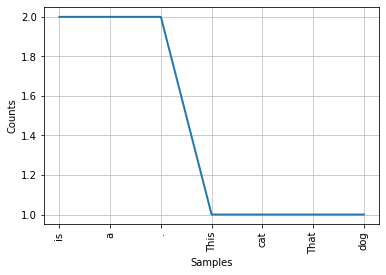

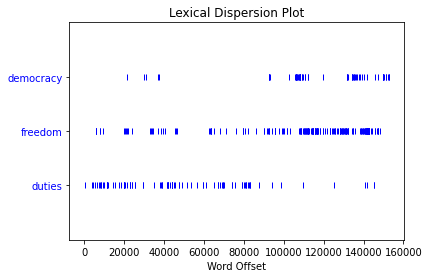

180
['of', 'the', 'and', 'to', 'have', 'that', 'which', 'by', ',', '.', 'a', 'in', 'it', 'be', 'is', 'for', 'our', 'we']


In [11]:
import nltk
mytxt='This is a cat. That is a dog.'
print(nltk.sent_tokenize(mytxt))
text=nltk.Text(nltk.word_tokenize(mytxt))
text.plot()
text4.dispersion_plot(['democracy','freedom','duties'])
dist=nltk.FreqDist(text4)
print(dist['freedom'])
print([w for w in dist.keys() if dist[w]>1000])

### 2.3 Term Frequency–Inverse Document Frequency (TF-IDF)

#### 2.3.1 Functions

In [12]:
import math
def tf(word, count): #count是一個word count的dictionary
    return count[word] / sum(count.values())
def nDoc_have(word, count_list):
    return sum(1 for count in count_list if word in count)
def idf(word, count_list):
    return math.log(len(count_list)) / (1 + nDoc_have(word, count_list))
def tfidf(word, count, count_list):
    return tf(word, count) * idf(word, count_list)

#### 2.3.2 Testing data

In [13]:
doc=['']*3
doc[0]=['a','a','b','c','d']
doc[1]=['a','b','b','c','d']
doc[2]=['a','b','c','c','d']

#construct word counts:
count = [{}, {}, {}]

for d in range(3):
    for word in doc[d]:
        if word not in count[d]:
            count[d][word]=1
        else:
            count[d][word]+=1
            
print(count)

[{'a': 2, 'b': 1, 'c': 1, 'd': 1}, {'a': 1, 'b': 2, 'c': 1, 'd': 1}, {'a': 1, 'b': 1, 'c': 2, 'd': 1}]


#### 2.3.3 TF-IDF

In [14]:
print(tfidf('a',count[0],count)) # "a" in the first document

0.10986122886681099


In [15]:
#print the tf-idf of each word in each documetes
keywords=[]
for d in range(3):
    print("Top words in document {}".format(d+1))
    scores={word: tfidf(word,count[d],count) for word in count[d]}
    sorted_words=sorted(scores.items(),key=lambda x:x[1],reverse=True)
    for word, score in sorted_words[:3]:
        print("\tWord: {}, TF-IDF: {}".format(word,round(score,5)))
        #create a list of keywords:
        keywords+=word

Top words in document 1
	Word: a, TF-IDF: 0.10986
	Word: b, TF-IDF: 0.05493
	Word: c, TF-IDF: 0.05493
Top words in document 2
	Word: b, TF-IDF: 0.10986
	Word: a, TF-IDF: 0.05493
	Word: c, TF-IDF: 0.05493
Top words in document 3
	Word: c, TF-IDF: 0.10986
	Word: a, TF-IDF: 0.05493
	Word: b, TF-IDF: 0.05493


#### 2.3.4 TF-IDF-based document vectors

In [16]:
keywords=list(set(keywords)) #remove duplicates
print(keywords)

#create a feature vector for each document:
fv=['']*3
for d in range(3):
    idx=0 #feature index
    fv[d]=[tfidf(word,count[d],count) for word in keywords]
print(fv)

['b', 'c', 'a']
[[0.054930614433405495, 0.054930614433405495, 0.10986122886681099], [0.10986122886681099, 0.054930614433405495, 0.054930614433405495], [0.054930614433405495, 0.10986122886681099, 0.054930614433405495]]


### 2.4 Chinese "word" segementation

In [17]:
#!pip install jieba
import jieba
text='結巴到底會不會成功地分解這行字呢?'
wordlist=jieba.cut(text,cut_all=False)
print("|".join(wordlist))
wordlist=jieba.cut(text,cut_all=True)
print("|".join(wordlist))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\vince\AppData\Local\Temp\jieba.cache
Loading model cost 2.377 seconds.
Prefix dict has been built successfully.


結巴|到底|會不會|成功|地|分解|這行|字|呢|?
結|巴|到底|會|不|會|成功|地|分解|這|行|字|呢|?


### 2.5 Topic Modeling

#### 2.5.0 Word ID & Dictionary

In [1]:
import gensim
import gensim.downloader as api
corpus=api.load('text8')
dictionary=gensim.corpora.Dictionary(corpus) # generate a dictionary from the text corpus
print(dictionary)

Dictionary(253854 unique tokens: ['a', 'abacus', 'abilities', 'ability', 'able']...)


In [2]:
print(dictionary.doc2bow(['a', 'abacus', 'abilities', 'ability']))
corpus2=[dictionary.doc2bow(word) for word in corpus]

[(0, 1), (1, 1), (2, 1), (3, 1)]


#### 2.5.1 Latent Dirichlet Allocation (LDA)

In [20]:
model=gensim.models.ldamodel.LdaModel(corpus2, num_topics=5, id2word=dictionary) #LDA training

In [21]:
model.print_topics(num_words=5)

[(0, '0.059*"the" + 0.037*"of" + 0.032*"one" + 0.027*"and" + 0.021*"in"'),
 (1, '0.075*"the" + 0.033*"of" + 0.024*"and" + 0.022*"in" + 0.022*"to"'),
 (2, '0.069*"the" + 0.030*"of" + 0.022*"in" + 0.022*"to" + 0.020*"one"'),
 (3, '0.050*"the" + 0.038*"of" + 0.027*"in" + 0.023*"one" + 0.021*"to"'),
 (4, '0.047*"the" + 0.033*"of" + 0.026*"and" + 0.025*"one" + 0.020*"a"')]

## 3 Modern Natural Language Processing (NLP)

### 3.1 Word2Vec
Check <a href="https://github.com/RaRe-Technologies/gensim-data">this</a> & <a href="https://github.com/3Top/word2vec-api#where-to-get-a-pretrained-models">this</a> for more text datasets & pretained models.

#### 3.1.0 Train a model

In [22]:
import gensim
import gensim.downloader as api
corpus=api.load('text8')

In [ ]:
model = gensim.models.word2vec.Word2Vec(corpus) # training

In [ ]:
model.wv.most_similar("car") # testing

#### 3.1.1 Man:King :: Woman:?

In [ ]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'])

#### 2.6.2 Man:Doctor :: Woman:?

In [ ]:
model.wv.most_similar(positive=['woman', 'doctor'], negative=['man'])

#### 2.6.3 (Good + Best)/2 = Better ?

In [ ]:
model.wv.word_vec('Good')

In [ ]:
what=(model.wv.word_vec('good')+model.wv.word_vec('best'))/2

In [ ]:
model.wv.similar_by_vector(what)

In [ ]:
model.wv.most_similar(positive=['good', 'best'])

### 3.1 Sentence/Document Vector

In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
import spacy

In [ ]:
# Load English tokenizer, tagger, parser and NER
import en_core_web_sm
nlp = en_core_web_sm.load()

# Process whole documents
doc1 = nlp("I love leehom!")
doc2 = nlp("I like leehom!")
doc3 = nlp("I hate leehom!")

In [ ]:
print(doc1.vector.shape)
print(doc1.vector)

In [ ]:
print(doc1.similarity(doc2))
print(doc1.similarity(doc3))

## 4 ChatBots

### 4.1 FrontEnd: Facebook Messengers

In [ ]:
#!pip install fbchat
from fbchat import log, Client
from fbchat.models import *
from getpass import getpass 

In [ ]:
# Example 1: Send a "Hi" to yourself
client = Client(input("Email: "), getpass('Password:')) 
print('Own id: {}'.format(client.uid))
client.send(Message(text='Hi!'), thread_id=client.uid, thread_type=ThreadType.USER)
client.logout()

In [ ]:
# Example 2 - EchoBot

class EchoBot(Client):
    def onMessage(self, author_id, message_object, thread_id, thread_type, **kwargs):
        self.markAsDelivered(thread_id, message_object.uid)
        self.markAsRead(thread_id)

        log.info("{} from {} in {}".format(message_object, thread_id, thread_type.name))
        if(message_object.text=='hi'):
            client.send(Message(text='Yes!'), thread_id=self.uid, thread_type=ThreadType.USER)
        # If you're not the author, echo
        if author_id != self.uid:
            self.send(message_object, thread_id=thread_id, thread_type=thread_type)

client = EchoBot(input("Email: "), getpass('Password:')) 
client.listen()

### 4.2 BackEnd

#### 4.2.1 ChatterBot: Write your own QAs

In [ ]:
#!pip install chatterbot chatterbot_corpus
#!python -m spacy link en_core_web_sm en
import chatterbot
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer

In [ ]:
chatbot = ChatBot("Psychoinformatics")

conversation = [
    "Hello",
    "Hi there!",
    "How are you doing?",
    "I'm doing great.",
    "That is good to hear",
    "Thank you.",
    "You're welcome.",
    "帥喔!",
    "帥只有一個字，卻跟了我一輩子~"
]

trainer = ListTrainer(chatbot)

trainer.train(conversation)

In [ ]:
print(chatbot.get_response("Hi there"))
print(chatbot.get_response("帥喔!"))